In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the CSV file
file_path = 'Occupation Data.csv'  # Replace this with the actual path to your file
data = pd.read_csv(file_path)

# Extracting the description column for clustering
descriptions = data['Description']

# Preprocessing the text data using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(descriptions)

# Applying LDA for clustering
n_topics = 5  # You can adjust the number of topics based on your needs
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Getting the top words for each topic
words = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[:-11:-1]]  # Top 10 words for each topic
    topics.append(top_words)

# Manually assigning names to each topic based on the top words
topic_names = {
    0: "Healthcare and Medical",
    1: "Manufacturing and Machinery",
    2: "Education and Teaching",
    3: "Maintenance and Repair",
    4: "Social Services and Health"
}

# Assigning each occupation to a topic
topic_assignments = lda.transform(X)
topic_labels = topic_assignments.argmax(axis=1)  # Get the topic with the highest probability for each occupation
data['Assigned Topic'] = topic_labels
data['Topic Name'] = data['Assigned Topic'].map(topic_names)  # Map numeric topics to names

# Counting the number of occupations in each topic
topic_counts = data['Topic Name'].value_counts().sort_index()

# Plotting the distribution of topics
plt.figure(figsize=(8, 6))
plt.bar(topic_names.values(), topic_counts, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Occupations')
plt.title('Distribution of Occupations Across Named Topics')
plt.xticks(rotation=45)
plt.show()

# Save the result to a new CSV file if needed
data.to_csv('Occupation_Topics_Named.csv', index=False)


ModuleNotFoundError: No module named 'pandas'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


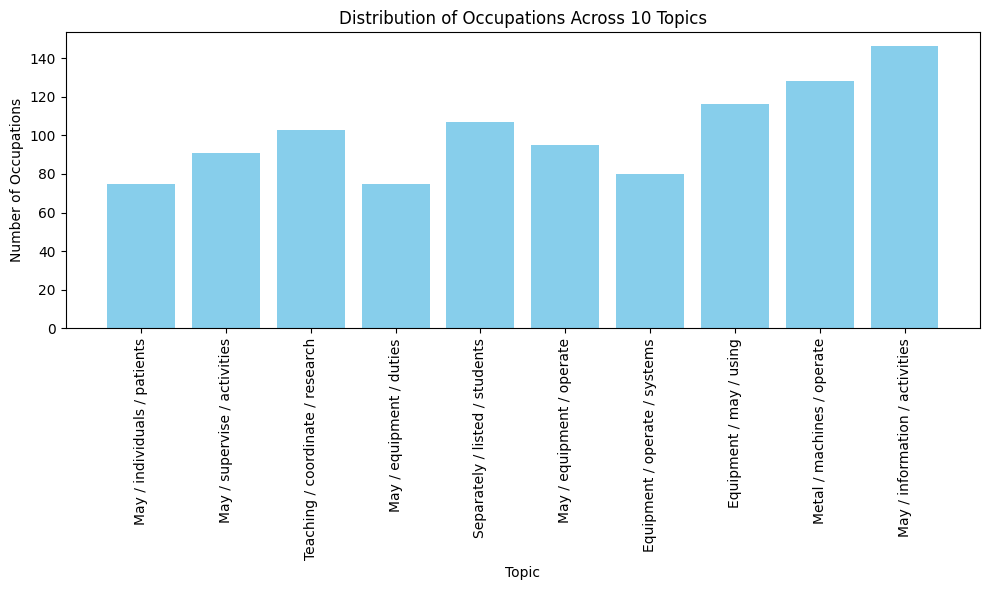

,Title,Description,Dynamic Topic Name
0,Chief Executives,Determine and formulate policies and provide o...,May / information / activities
1,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",May / information / activities
2,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",Teaching / coordinate / research
3,Legislators,"Develop, introduce, or enact laws and statutes...",May / supervise / activities
4,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",Teaching / coordinate / research
...,...,...,...
1011,Artillery and Missile Crew Members,"Target, fire, and maintain weapons used to des...",Equipment / operate / systems
1012,Command and Control Center Specialists,"Operate and monitor communications, detection,...",May / supervise / activities
1013,Infantry,Operate weapons and equipment in ground combat...,May / supervise / activities
1014,Special Forces,"Implement unconventional operations by air, la...",May / supervise / activities


In [25]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the CSV file
file_path = 'Occupation Data.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Extracting the description column for clustering
descriptions = data['Description']

# Preprocessing the text data using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(descriptions)

# Get the feature names (words) from the CountVectorizer
words = vectorizer.get_feature_names_out()

# Function to dynamically generate topic names based on top words
def generate_topic_name(top_words, n_words=3):
    """Generate a topic name based on the top n words."""
    return ' / '.join(top_words[:n_words]).capitalize()

# Function to apply LDA with dynamic number of topics
def lda_with_dynamic_topics(n_topics, words, X):
    # Applying LDA with dynamic number of topics
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # Getting the top words for each topic
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [words[i] for i in topic.argsort()[:-11:-1]]  # Top 10 words for each topic
        topics.append(top_words)

    # Generating dynamic topic names based on top words for each topic
    dynamic_topic_names = {}
    for idx, words in enumerate(topics):
        dynamic_topic_names[idx] = generate_topic_name(words)

    # Assigning topics to occupations
    topic_assignments = lda.transform(X)
    topic_labels = topic_assignments.argmax(axis=1)
    data['Assigned Topic'] = topic_labels
    data['Dynamic Topic Name'] = data['Assigned Topic'].map(dynamic_topic_names)
    
    # Visualizing the topic distribution
    topic_counts = data['Dynamic Topic Name'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(dynamic_topic_names.values(), topic_counts, color='skyblue')
    plt.xlabel('Topic')
    plt.ylabel('Number of Occupations')
    plt.title(f'Distribution of Occupations Across {n_topics} Topics')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Return the dynamic topic names and topic assignments
    return dynamic_topic_names, data

# Example usage with 10 topics
dynamic_topic_names, data_with_dynamic_topics = lda_with_dynamic_topics(10, words, X)

# Display the data with dynamically assigned topics
data_with_dynamic_topics[['Title', 'Description', 'Dynamic Topic Name']]
